## Problem Statement 9
### Object detection using Transfer Learning of CNN architectures for the given (image dataset 1) using the below steps: 
    a. Load in a pre-trained CNN model trained on a large dataset 
    b. Freeze parameters (weights) in model's lower convolutional layers 
    c. Add custom classifier with several layers of trainable parameters to model 
    d. Train classifier layers on training data available for task
    e. Fine-tune hyper parameters and unfreeze more layers as needed

### Import required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import Accuracy
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img_generator = ImageDataGenerator(
    brightness_range=(0.5,1),
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale = 1./255,
    validation_split=0.3
)

In [3]:
root_dir = "E:\SEM_7\LP-4\Final_Practical\LP-IV-datasets\Object_Detection(Ass6)\caltech-101-img"

img_generator_flow_train = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle =True,
    subset = "training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    subset = "validation")

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


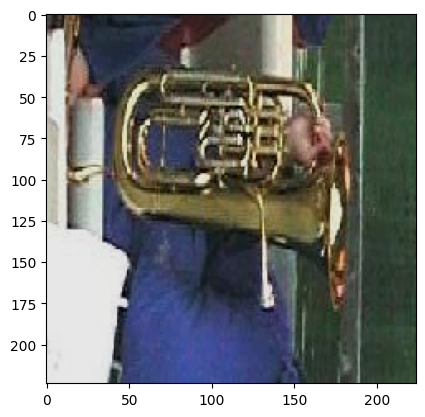

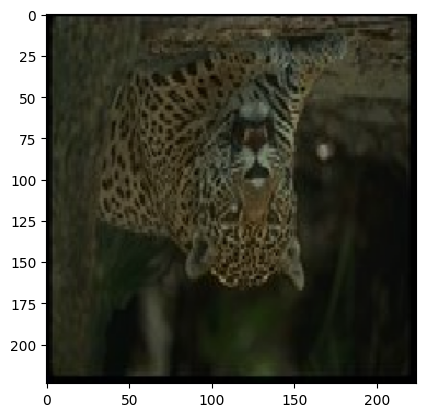

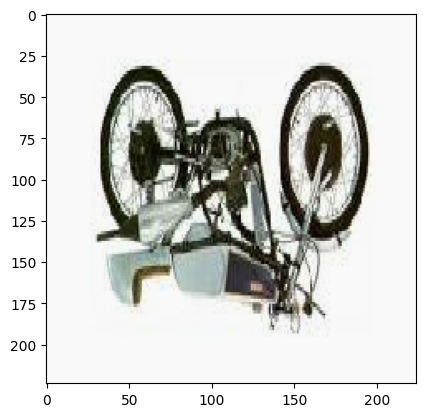

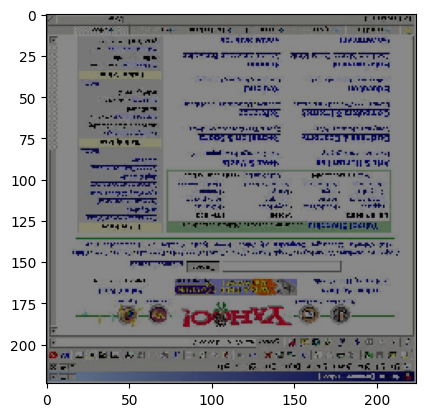

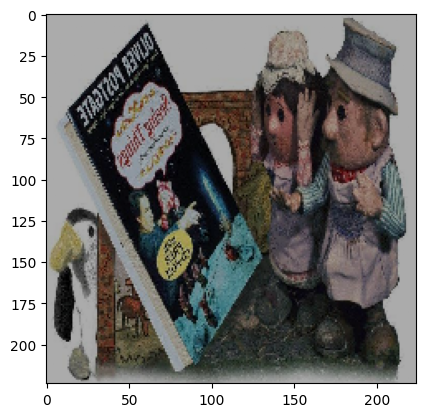

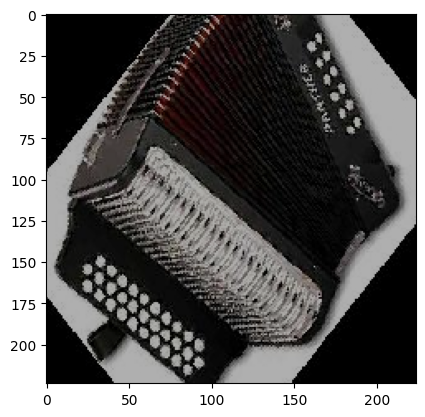

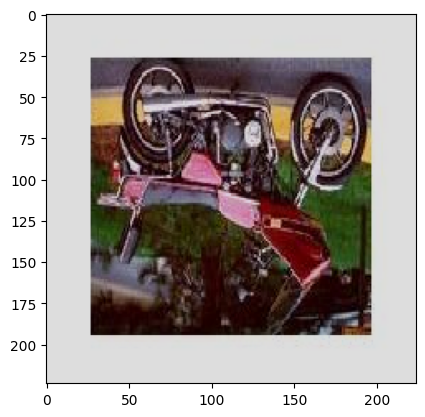

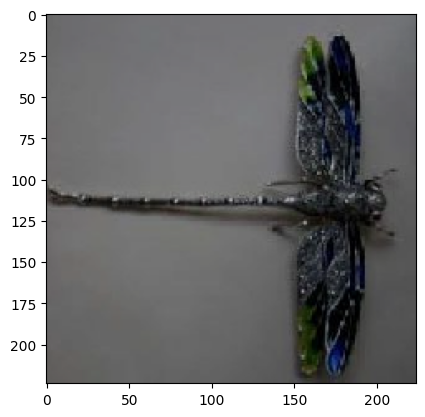

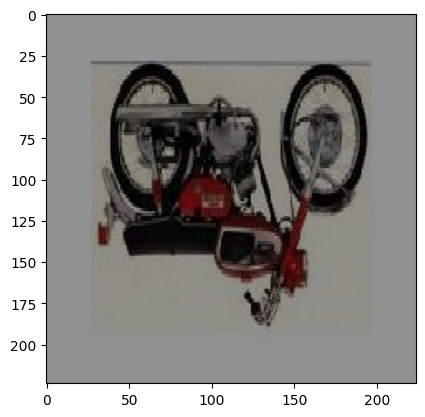

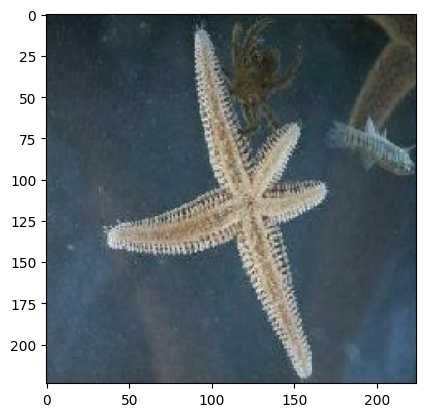

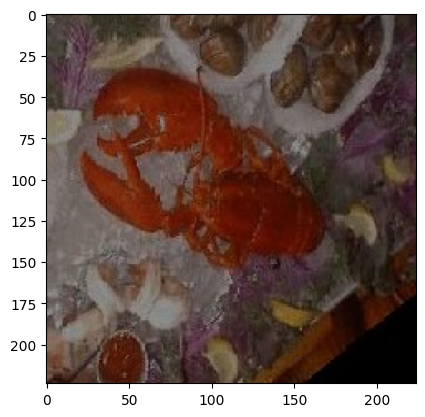

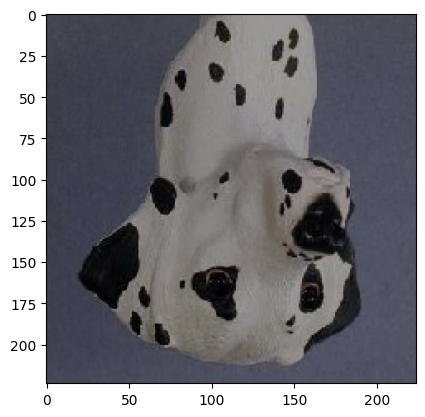

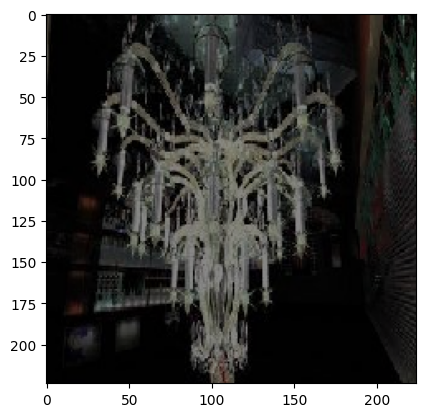

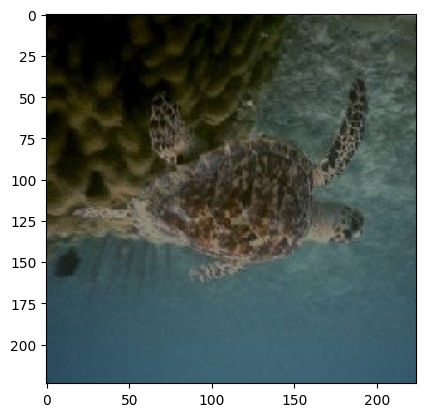

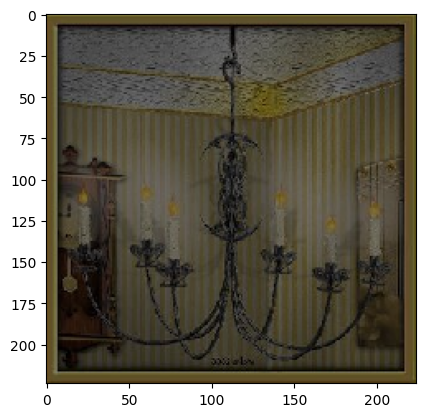

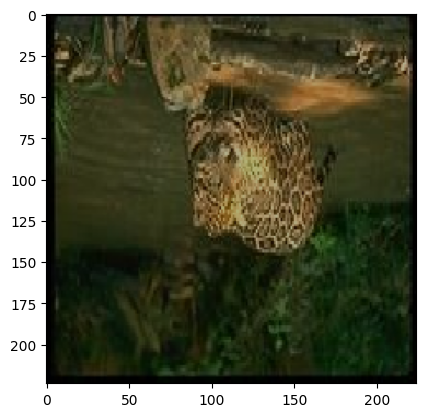

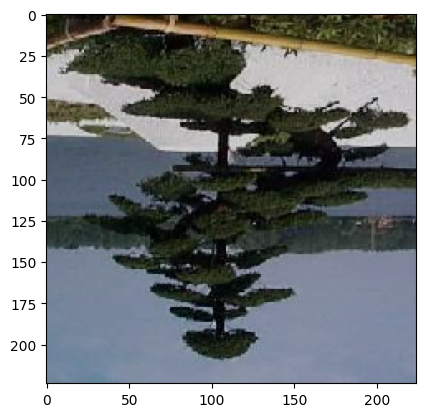

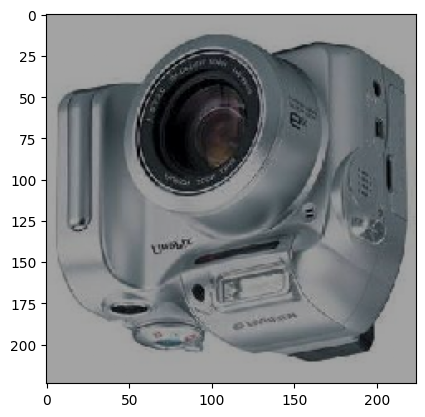

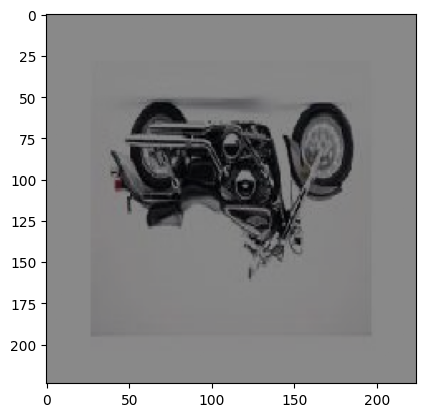

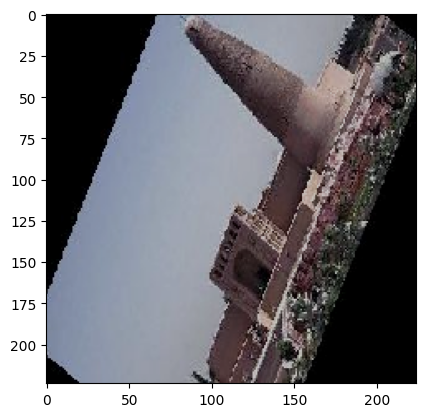

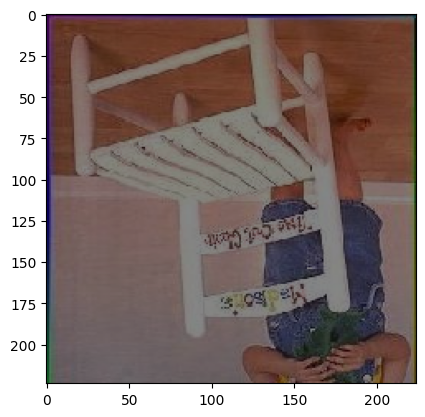

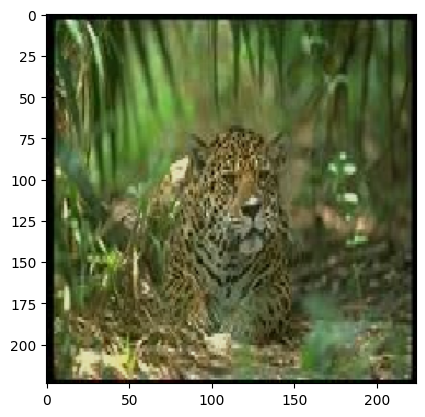

In [4]:
imgs, labels = next(iter(img_generator_flow_train))
for img, labels in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

## a. Loading pre-trained model

In [5]:
model_path = "E:/SEM_7/LP-4/Final_Practical/LP-IV-datasets/Object_Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = VGG16(input_shape=(224, 224, 3),
                   include_top = False, 
                   weights = model_path)

## b. Freeze parameters

In [6]:
base_model.trainable = False

## c. Add custom classifier with several layers of trainable parameteres to model

In [7]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 102)               470118    
                                                                 
Total params: 15184806 (57.93 MB)
Trainable params: 470118 (1.79 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## d. Train classifier layers on training data available for task

In [10]:
adam = Adam(0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5,
          epochs = 10)

Epoch 1/10
5/5 [==============================] - 248s 61s/step - loss: 1.7957 - accuracy: 0.5938 - val_loss: 1.7864 - val_accuracy: 0.6093
Epoch 2/10
5/5 [==============================] - 251s 62s/step - loss: 1.4354 - accuracy: 0.6938 - val_loss: 1.7879 - val_accuracy: 0.5944
Epoch 3/10
5/5 [==============================] - 247s 61s/step - loss: 1.6127 - accuracy: 0.6313 - val_loss: 1.7103 - val_accuracy: 0.6119
Epoch 4/10
5/5 [==============================] - 249s 62s/step - loss: 1.6860 - accuracy: 0.5813 - val_loss: 1.6312 - val_accuracy: 0.6130
Epoch 5/10
5/5 [==============================] - 245s 60s/step - loss: 1.4366 - accuracy: 0.6625 - val_loss: 1.6416 - val_accuracy: 0.6089
Epoch 6/10
5/5 [==============================] - 160s 39s/step - loss: 1.2424 - accuracy: 0.6875 - val_loss: 1.6424 - val_accuracy: 0.5993
Epoch 7/10
5/5 [==============================] - 160s 40s/step - loss: 1.4593 - accuracy: 0.6875 - val_loss: 1.6018 - val_accuracy: 0.6115
Epoch 8/10
5/5 [====

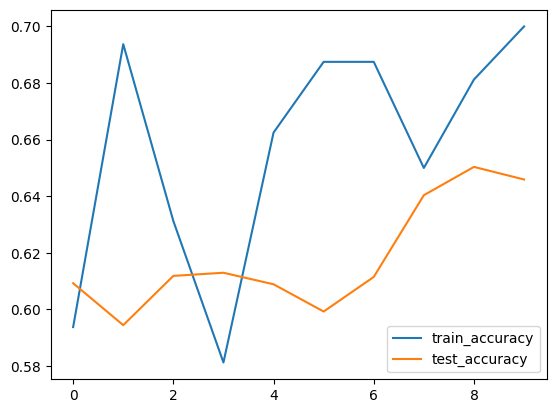

In [18]:
plt.plot(model.history.history['accuracy'], label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()

# Fine-tune hyper parameters and unfreeze more layers

In [19]:
base_model.trainable = True

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')

In [23]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5, 
          epochs=10)

Epoch 1/10
5/5 [==============================] - 284s 69s/step - loss: 4.4428 - categorical_accuracy: 0.0437 - val_loss: 4.4032 - val_categorical_accuracy: 0.0519
Epoch 2/10
5/5 [==============================] - 286s 69s/step - loss: 4.3799 - categorical_accuracy: 0.0312 - val_loss: 4.3990 - val_categorical_accuracy: 0.0519
Epoch 3/10
5/5 [==============================] - 289s 69s/step - loss: 4.3862 - categorical_accuracy: 0.0625 - val_loss: 4.3077 - val_categorical_accuracy: 0.0641
Epoch 4/10
5/5 [==============================] - 284s 68s/step - loss: 4.3912 - categorical_accuracy: 0.0929 - val_loss: 4.2633 - val_categorical_accuracy: 0.0889
Epoch 5/10
5/5 [==============================] - 292s 70s/step - loss: 4.2542 - categorical_accuracy: 0.1125 - val_loss: 4.2787 - val_categorical_accuracy: 0.0889
Epoch 6/10
5/5 [==============================] - 231s 55s/step - loss: 4.3772 - categorical_accuracy: 0.0688 - val_loss: 4.3404 - val_categorical_accuracy: 0.0889
Epoch 7/10
5/5 [

In [ ]:
TensorFlow and Keras: These are popular deep learning libraries. TensorFlow is an open-source library developed by Google, and Keras is a high-level API within TensorFlow that makes building and training neural networks easier.

CNN (Convolutional Neural Network): A type of neural network specifically designed for image processing. CNNs use convolutional layers to automatically detect important features in images, like edges and textures, which help in object detection and classification.

Transfer Learning: A technique where a model trained on a large dataset (e.g., ImageNet) is reused on a different but related task. Instead of training a model from scratch, we "transfer" the knowledge learned from the original dataset to our specific task, saving time and resources.

VGG16: This is a well-known pre-trained CNN architecture developed by Oxford's Visual Geometry Group. It has 16 layers, hence the name. It’s widely used for transfer learning due to its effectiveness in image classification tasks.

Pre-trained Model: A model that has already been trained on a large dataset. Here, we load the VGG16 model, which was trained on the ImageNet dataset. Pre-trained models provide a good starting point for new tasks.

Freezing Layers: When we set base_model.trainable = False, we freeze the weights of the VGG16 layers, which means these layers will not be updated during training. This helps retain the learned features and avoids overfitting when we add our custom layers.

ImageDataGenerator: A Keras utility that generates batches of image data with real-time data augmentation. It applies transformations like brightness adjustments, flips, and rescaling to increase the diversity of training images, which helps improve model generalization.

Image Augmentation: This involves making slight modifications to the training images, like changing brightness or flipping them horizontally/vertically, to create more varied data. It’s used to make the model more robust to different image conditions.

Batch Size: The number of images processed together in one pass through the model. Here, a batch size of 32 means the model will update its weights every 32 images.

Target Size: The dimensions (224x224) to which each image is resized before feeding it to the model. This size is used because VGG16 requires 224x224 images as input.

MaxPooling2D: A layer that reduces the spatial dimensions (width and height) of the feature maps, keeping only the most important information. Pooling helps reduce computation and prevents overfitting.

Flatten: This layer converts the pooled feature maps (which are 2D) into a 1D vector, preparing the data for the Dense (fully connected) layers.

Dense Layer: A fully connected layer in which each neuron is connected to every neuron in the previous layer. In this code, we add a Dense layer with 102 neurons for multi-class classification, with a softmax activation to output class probabilities.

Softmax Activation: An activation function used in the final layer for multi-class classification. It converts raw scores into probabilities, with the sum of probabilities equal to 1, so we can interpret it as the likelihood of each class.

Adam Optimizer: An optimization algorithm that adjusts the model's weights to minimize the loss function. Adam is popular because it adapts the learning rate for each parameter, speeding up convergence.

Categorical Crossentropy Loss: A loss function commonly used for multi-class classification tasks. It measures the difference between the predicted and actual class probabilities.

Metrics - Accuracy: This metric calculates the percentage of correct predictions. In this case, the accuracy metric shows how well the model is performing on both training and validation data.

Epochs: One epoch is one complete pass through the entire training dataset. Here, we train the model for a total of 10 epochs in each phase.

Fine-Tuning: Adjusting hyperparameters and unfreezing more layers of the base model (i.e., setting base_model.trainable = True) to further improve performance. Fine-tuning allows the model to learn task-specific features.

Confusion Matrix: A matrix that summarizes the performance of a classification algorithm by displaying the number of correct and incorrect predictions for each class. It's useful for understanding the strengths and weaknesses of the model across different classes.

Plotting Accuracy: Visualizing train_accuracy and val_accuracy helps us understand how the model’s performance improves over time and if there's overfitting (where training accuracy is much higher than validation accuracy).

This setup involves using a pre-trained model (VGG16), customizing it with a new classifier for object detection, and fine-tuning to improve its performance on the specific dataset. Let me know if you need further clarification on any of these terms!